In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
x = torch.tensor([1, 2, 3, 4]).view(2, -1)
print(x)

tensor([[1, 2],
        [3, 4]])


In [0]:
torch.arange(2, 5)

tensor([2, 3, 4])

In [0]:
x = torch.tensor(2.0, requires_grad = True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1
y.backward()
x.grad

tensor(330.)

In [0]:
x = torch.tensor(1.0, requires_grad=True)
z = torch.tensor(2.0, requires_grad=True)
y = x**2 + z**3
y.backward()
z.grad


tensor(12.)

In [0]:
from torch.nn import Linear
torch.manual_seed(2)
model = Linear(in_features = 1, out_features = 1)
print(model.bias,'\n',model.weight, '\n', model.bias[0])


Parameter containing:
tensor([-0.2380], requires_grad=True) 
 Parameter containing:
tensor([[0.2294]], requires_grad=True) 
 tensor(-0.2380, grad_fn=<SelectBackward>)


In [0]:
x = torch.tensor([ [2.0], [3.3]])
print(model(x))

tensor([[0.2208],
        [0.5190]], grad_fn=<AddmmBackward>)


In [0]:
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1, 1)
x = torch.tensor([[1.0], [2.0]])
print(x)


tensor([[1.],
        [2.]])


In [0]:

print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


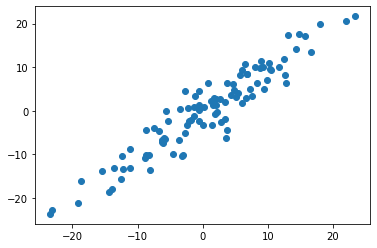

In [0]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3
plt.plot(X.numpy(), y.numpy(), 'o')

In [0]:
[w, b] = model.parameters()
print(w, b)
def get_params():
  return (w[0][0].item(), b[0].item())

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()


Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


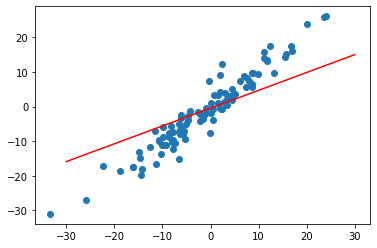

In [0]:
plot_fit('Init model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [0]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)  #  calculate y_pred now 
  loss = criterion(y_pred, y) # calculate the loss 
  print("epoch: ", i, "loss: ", loss)

  losses.append(loss)
  optimizer.zero_grad()      # 
  loss.backward()            #  derivative the loss
  optimizer.step()           #  update the model's weight
  

epoch:  0 loss:  tensor(28.9146, grad_fn=<MseLossBackward>)
epoch:  1 loss:  tensor(20.6130, grad_fn=<MseLossBackward>)
epoch:  2 loss:  tensor(15.9653, grad_fn=<MseLossBackward>)
epoch:  3 loss:  tensor(13.3633, grad_fn=<MseLossBackward>)
epoch:  4 loss:  tensor(11.9066, grad_fn=<MseLossBackward>)
epoch:  5 loss:  tensor(11.0910, grad_fn=<MseLossBackward>)
epoch:  6 loss:  tensor(10.6344, grad_fn=<MseLossBackward>)
epoch:  7 loss:  tensor(10.3788, grad_fn=<MseLossBackward>)
epoch:  8 loss:  tensor(10.2356, grad_fn=<MseLossBackward>)
epoch:  9 loss:  tensor(10.1555, grad_fn=<MseLossBackward>)
epoch:  10 loss:  tensor(10.1106, grad_fn=<MseLossBackward>)
epoch:  11 loss:  tensor(10.0854, grad_fn=<MseLossBackward>)
epoch:  12 loss:  tensor(10.0713, grad_fn=<MseLossBackward>)
epoch:  13 loss:  tensor(10.0634, grad_fn=<MseLossBackward>)
epoch:  14 loss:  tensor(10.0590, grad_fn=<MseLossBackward>)
epoch:  15 loss:  tensor(10.0565, grad_fn=<MseLossBackward>)
epoch:  16 loss:  tensor(10.0551, 

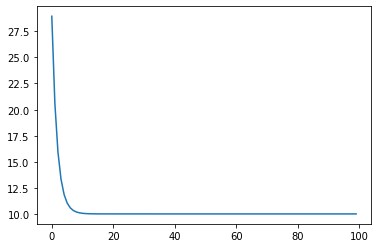

In [0]:
plt.plot(np.arange(epochs), losses)

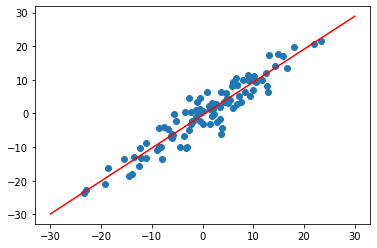

In [0]:
plot_fit("trained model")

In [0]:
get_params()

(0.9800482988357544, -0.4760326147079468)